In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df = pd.read_csv('StudentsPerformance.csv')

In [224]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [225]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [226]:
print(df['gender'].unique())
print(df['race/ethnicity'].unique())
print(df['parental level of education'].unique())
print(df['lunch'].unique())
print(df['test preparation course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [227]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['gender'] = LE.fit_transform(df['gender'])
df['race/ethnicity'] = LE.fit_transform(df['race/ethnicity'])
df['parental level of education'] = LE.fit_transform(df['parental level of education'])
df['test preparation course'] = LE.fit_transform(df['test preparation course'])

In [228]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,standard,1,72,72,74
1,0,2,4,standard,0,69,90,88
2,0,1,3,standard,1,90,95,93
3,1,0,0,free/reduced,1,47,57,44
4,1,2,4,standard,1,76,78,75


<Axes: xlabel='gender', ylabel='count'>

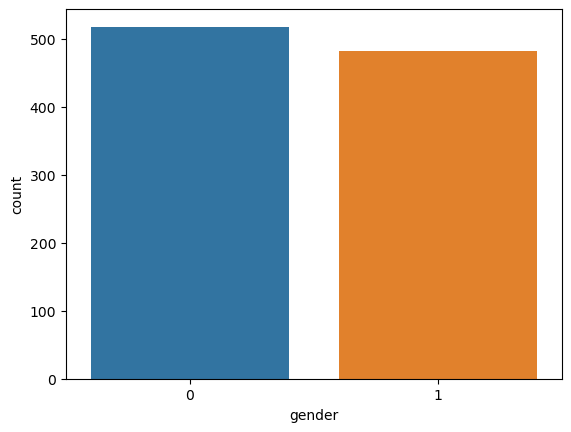

In [229]:
sns.countplot(x='gender',data=df)

In [230]:
df.drop('lunch',axis=1,inplace=True)

In [231]:
df.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,0,1,1,1,72,72,74
1,0,2,4,0,69,90,88
2,0,1,3,1,90,95,93
3,1,0,0,1,47,57,44
4,1,2,4,1,76,78,75


In [232]:
df['Average score'] = round((df['math score']+df['reading score']+df['writing score'])/3,2)

In [233]:
df.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,Average score
0,0,1,1,1,72,72,74,72.67
1,0,2,4,0,69,90,88,82.33
2,0,1,3,1,90,95,93,92.67
3,1,0,0,1,47,57,44,49.33
4,1,2,4,1,76,78,75,76.33


In [234]:
df.drop('math score',axis=1,inplace=True)
df.drop('reading score',axis=1,inplace=True)
df.drop('writing score',axis=1,inplace=True)

In [235]:
df.duplicated().sum()

39

In [236]:
df.drop_duplicates(inplace=True)

In [237]:
df.duplicated().sum()

0

In [238]:
df.head()

,gender,race/ethnicity,parental level of education,test preparation course,Average score
0,0,1,1,1,72.67
1,0,2,4,0,82.33
2,0,1,3,1,92.67
3,1,0,0,1,49.33
4,1,2,4,1,76.33


In [239]:
X=df.iloc[:,0:4]
Y=df.iloc[:,-1]

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

v1 = LinearRegression()
v2 = DecisionTreeRegressor()
v3 = RandomForestRegressor()

v1.fit(X,Y)
v2.fit(X,Y)
v3.fit(X,Y)

estimators = [('v1',v1),('v2',v2),('v3',v3)]

In [241]:
from sklearn.ensemble import VotingRegressor
VR = VotingRegressor(estimators)
VR.fit(X,Y)
VR.predict([[0,2,4,0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([75.27861197])

In [242]:
print(v1.predict([[0,1,1,1]]))
print(v2.predict([[0,1,1,1]]))
print(v3.predict([[0,1,1,1]]))

[65.18151255]
[77.63222222]
[77.81713724]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [243]:
import pickle
pickle.dump(df,open('Studentperformance.pkl','wb'))